# Probability Distributions in Data Science

Probability distributions describe how values of a random variable are distributed. Understanding distributions is essential for statistical modeling, hypothesis testing, and machine learning.

This notebook will cover the essentials of the most common distributions possible: discrete (Bernoulli; Binomial; Poisson), continuous (Uniform; Gaussian; Exponential), as well as the Gamma, Beta, Cauchy and Chi-Squared distributions. Each one willexpose the main function, mean and variance formulas, as well as listing applications, with some of them containing code examples to better visualise the context.

Libraries used are the following:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

## Index

1. [Discrete Distributions](#1-discrete-distributions)
   1. [Bernoulli](#11-bernoulli-distribution)
   2. [Binomial](#12-binomial-distribution)
   3. [Poisson](#13-poisson-distribution)
2. [Continuous Distributions](#2-continuous-distributions)
   1. [Uniform](#21-uniform-distribution)
   2. [Gaussian](#22-normal-gaussian-distribution)
   3. [Exponential](#23-exponential-distribution)
3. [Other Distributions](#3-other-notable-distributions)
   1. [Gamma](#31-gamma-distribution)
   2. [Beta](#32-beta-distribution)
   3. [Cauchy](#33-cauchy-distribution)
   4. [Chi-Squared](#34-chi-square-distribution)
4. [Common Use-cases](#4-where-to-find-each-type-of-distribution)
5. [Extra Resources](#5-extra-resources)

## 1. Discrete Distributions 

Discrete distributions describe variables that take on a finite or countable number of values.

### 1.1 Bernoulli Distribution
A Bernoulli distribution models a single experiment with two possible outcomes: success (1) or failure (0).

**Properties**
- PMF: $P(X = x) = p^x (1 - p)^{1-x}, \quad x \in \{0,1\}$
- Mean: $\mu = p$
- Variance: $\sigma^2 = p(1 - p)$

**Applications:**
- Binary classification problems.
- Coin flips.
- Success/failure experiments.

**Practical Example:**
A startup wants to test whether their email campaign is successful. If a user clicks the link, it's considered a success (1), otherwise a failure (0).

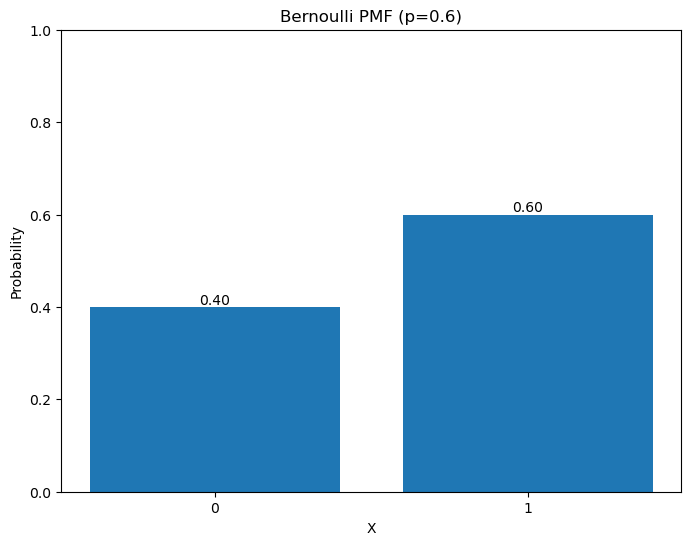

In [8]:
def bernoulli_pmf(x, p):
    return p if x == 1 else 1 - p

p = 0.6
x_values = [0, 1]
probabilities = [bernoulli_pmf(x, p) for x in x_values]

plt.figure(figsize=(8, 6))
plt.bar(x_values, probabilities)
plt.title(f'Bernoulli PMF (p={p})')
plt.xlabel('X')
plt.ylabel('Probability')
plt.xticks(x_values)
plt.ylim(0, 1)
for i, prob in enumerate(probabilities):
    plt.text(i, prob, f'{prob:.2f}', ha='center', va='bottom')
plt.show()

### 1.2 Binomial Distribution
Models the number of successes in `n` independent Bernoulli trials.

**Properties**
- PMF: $P(X = k) = \binom{n}{k} p^k (1 - p)^{n-k}$
- Mean: $\mu = n*p$
- Variance: $\sigma^2 = n*p(1 - p)$

**Applications:**
- A/B testing in marketing.
- Number of defective items in a batch.
- Polling statistics.

**Practical Example:**
A company launches an ad campaign targeting 10,000 users. Each user has a 30% chance of clicking the ad.

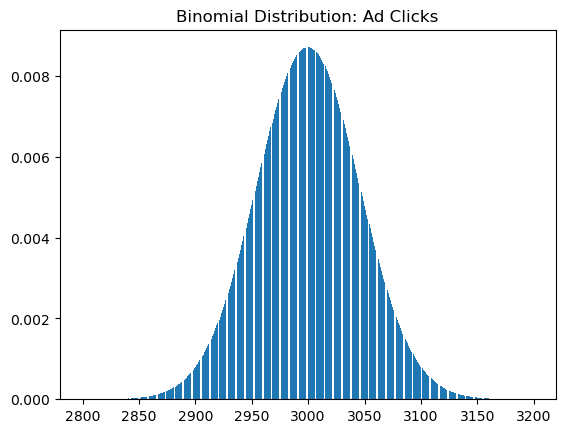

In [9]:
n, p = 10000, 0.3
binomial_rv = stats.binom(n, p)
x = np.arange(2800, 3200)
y = binomial_rv.pmf(x)
plt.bar(x, y)
plt.title("Binomial Distribution: Ad Clicks")
plt.show()

### 1.3 Poisson Distribution
Models the number of events occurring in a fixed interval of time or space.

**Properties**
- PMF: $P(X = k) = \frac{\lambda^k e^{-\lambda}}{k!}$
- Mean and Variance: $\mu = \sigma^2 = \lambda$

**Applications:**
- Call center queue modeling.
- Website traffic predictions.
- Number of earthquakes in a year.

**Practical Example:**
A call center receives an average of 10 calls per hour. What is the probability of receiving exactly 15 calls?


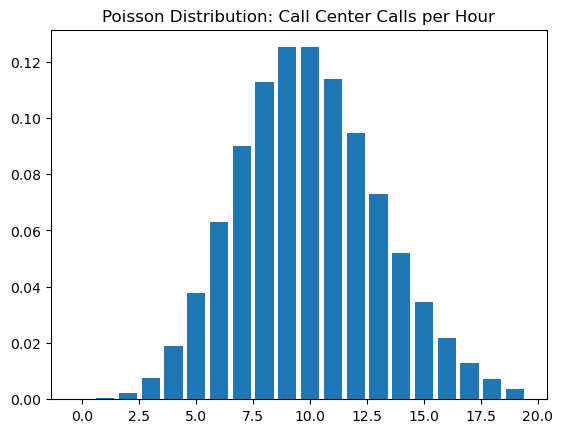

P(X=15) = 3.4718069630684245 %


In [12]:
lmbda = 10
poisson_rv = stats.poisson(lmbda)
x = np.arange(0, 20)
y = poisson_rv.pmf(x)
plt.bar(x, y)
plt.title("Poisson Distribution: Call Center Calls per Hour")
plt.show()

print("P(X=15) =", poisson_rv.pmf(15) * 100, "%")

## 2. Continuous Distributions 
Continuous distributions describe variables that can take on an infinite number of values within a range.

### 2.1 Uniform Distribution
All values in an interval have equal probability.

**Properties:**
- PDF: $f(x) = \frac{1}{b - a}, \quad a \leq x \leq b$
- Mean: $\mu = \frac{a + b}{2}$
- Variance: $\sigma^2 = \frac{(b - a)^2}{12}$

**Applications:**
- Random number generation.
- Monte Carlo simulations.

### 2.2 Normal (Gaussian) Distribution
The most common distribution, known as the bell curve.

**Properties:**
- PDF: $f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}$
- Mean: $\mu$
- Variance: $\sigma^2$

**Applications:**
- Heights and weights of individuals.
- Stock price fluctuations.
- Measurement errors in experiments.

**Practical Example:**
Heights of adults in a city follow a normal distribution with mean 170cm and standard deviation 10cm.


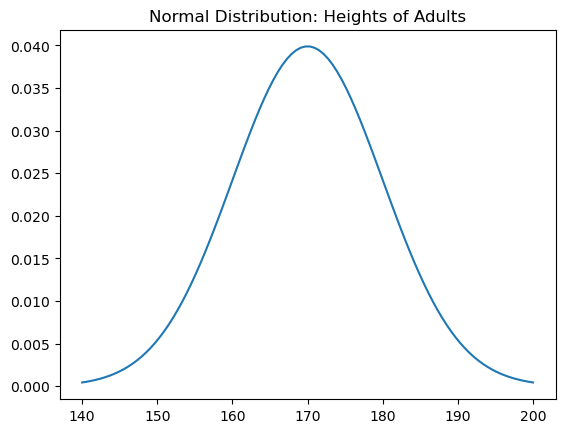

P(X >= 180) = 15.865525393145708 %


In [16]:
mu, sigma = 170, 10
normal_rv = stats.norm(mu, sigma)
x = np.linspace(140, 200, 100)
y = normal_rv.pdf(x)
plt.plot(x, y)
plt.title("Normal Distribution: Heights of Adults")
plt.show()

print("P(X >= 180) =", (1 - normal_rv.cdf(180)) * 100, "%")

### 2.3 Exponential Distribution
Models the time between events in a Poisson process.

**Properties:**
- PDF: $f(x) = \lambda e^{-\lambda x}, \quad x \geq 0$
- Mean: $\mu = 1/\lambda$
- Variance: $\sigma^2 = 1/\lambda^2$

**Applications:**
- Time until failure of machinery.
- Customer arrival times in service systems.

**Practical Example:**
A bank tracks the time between customer arrivals, with an average arrival rate of 5 minutes.


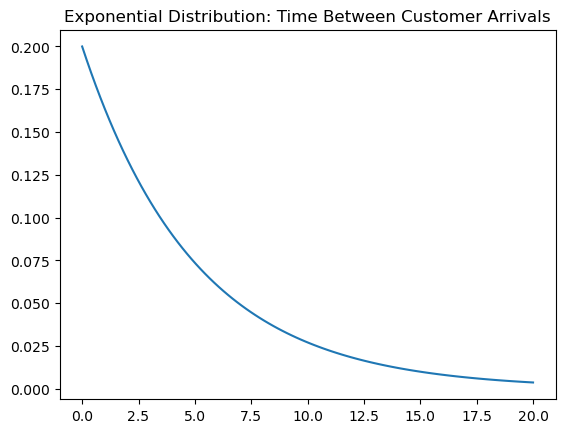

In [17]:
lmbda = 1/5
exponential_rv = stats.expon(scale=1/lmbda)
x = np.linspace(0, 20, 100)
y = exponential_rv.pdf(x)
plt.plot(x, y)
plt.title("Exponential Distribution: Time Between Customer Arrivals")
plt.show()

## 3. Other Notable Distributions 

### 3.1 Gamma Distribution
The Gamma distribution is a generalization of the Exponential distribution, often used for waiting times when multiple independent events occur.

**Properties:**

- PDF: $f(x) = \frac{\lambda^k x^{k-1} e^{-\lambda x}}{(k-1)!}, \quad x > 0$
- Mean: $\mu = k/\lambda$
- Variance: $\sigma^2 = k/\lambda^2$

**Applications:**
- Modeling insurance claims.
- Reliability analysis of systems.
- Queuing theory.

**Practical Example:**
The time until an insurance claim is filed follows a Gamma distribution.

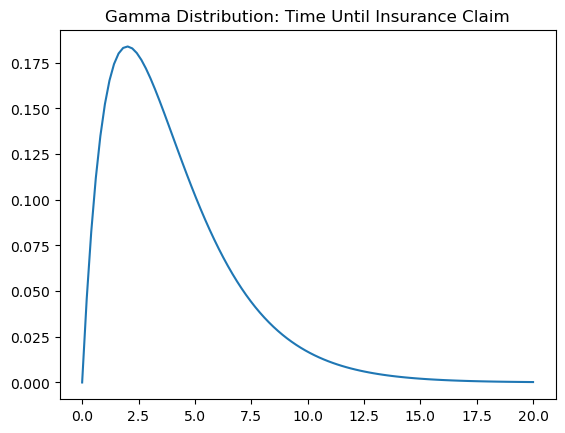

In [18]:
shape, scale = 2, 2
gamma_rv = stats.gamma(shape, scale=scale)
x = np.linspace(0, 20, 100)
y = gamma_rv.pdf(x)
plt.plot(x, y)
plt.title("Gamma Distribution: Time Until Insurance Claim")
plt.show()

### 3.2 Beta Distribution
The Beta distribution is a flexible distribution used in Bayesian statistics and probability modeling.

**Properties**
- PDF: $f(x) = \frac{x^{\alpha-1} (1-x)^{\beta-1}}{B(\alpha, \beta)}, \quad 0 \leq x \leq 1$
- Mean: $\mu = \frac{\alpha}{\alpha + \beta}$
- Variance: $\sigma^2 = \frac{\alpha \beta}{(\alpha + \beta)^2 (\alpha + \beta + 1)}$

**Applications:**
- Bayesian statistics.
- Proportion and probability estimations.
- Machine learning hyperparameter tuning.

**Practical Example:**
Modeling customer satisfaction scores between 0 and 1 in a survey.

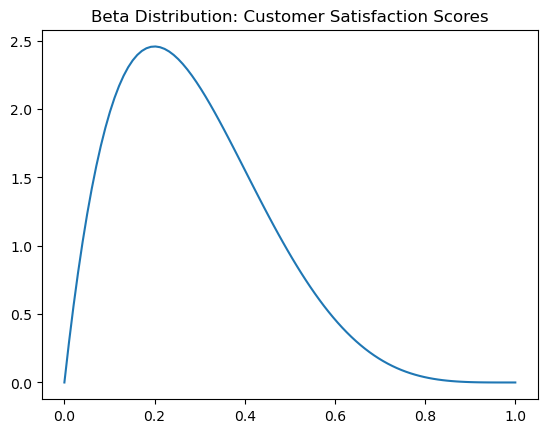

In [19]:
alpha, beta = 2, 5
beta_rv = stats.beta(alpha, beta)
x = np.linspace(0, 1, 100)
y = beta_rv.pdf(x)
plt.plot(x, y)
plt.title("Beta Distribution: Customer Satisfaction Scores")
plt.show()

### 3.3 Cauchy Distribution
The Cauchy distribution is a heavy-tailed distribution with undefined mean and variance.

**Properties:**
- PDF: $f(x) = \frac{1}{\pi \gamma \left[ 1 + \left( \frac{x - x_0}{\gamma} \right)^2 \right] }, \quad -\infty < x < \infty$
- No defined mean or variance


**Applications:**
- Outlier detection.
- Physics (resonance behavior).
- Financial modeling with extreme values.


### 3.4 Chi-Square Distribution
The Chi-Square distribution is used extensively in hypothesis testing and inferential statistics.

**Properties**
- PDF: $f(x) = \frac{x^{(k/2)-1} e^{-x/2}}{2^{k/2} \Gamma(k/2)}, \quad x > 0$
- Mean: $\mu = k$
- Variance: $\sigma^2 = 2k$

**Applications:**
- Goodness-of-fit tests.
- Estimation of population variance.
- Independence tests in categorical data.

## 4. Where to Find Each Type of Distribution

| Distribution Type  | Common Applications |
|--------------------|----------------------------------|
| **Bernoulli**      | Coin flips, success/failure trials |
| **Binomial**       | A/B testing, quality control |
| **Poisson**        | Event counts over time, call arrivals |
| **Uniform**        | Random number generation, lotteries |
| **Normal**         | Heights, stock prices, exam scores |
| **Exponential**    | Machine failure times, service queues |
| **Gamma**          | Insurance claims, waiting times |
| **Beta**           | Bayesian statistics, probability estimations |
| **Cauchy**         | Outlier modeling, physical resonances |
| **Chi-Square**     | Hypothesis testing, independence tests |


## 5. **Extra Resources**

- [Scribbr](https://www.scribbr.com/statistics/probability-distributions/)
- [Geeks4Geeks](https://www.geeksforgeeks.org/probability-distribution/)